# Exploratory data analysis and data preprocessing for GitHub Dataset 

## 一 、数据摘要
    

In [1]:
# 首先导入相关包，观察数据结构
import pandas as pd
import numpy  as np

target_data = pd.read_csv('./github_dataset.csv')
target_data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [2]:
#单独提出数据的属性列便于观察
target_data_columns = target_data.columns
target_data_columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

可以看到数据集已被成功加载，其属性列名称分别代表：  
repositories（仓库名称）,stars_count（星标数）,   
forks_count（分支数）, issues_count（问题数）,   
pull_requests（拉取请求数）, contributors（贡献者数）,   
以及language（编程语言）,从初步观察来看，language列存在缺失值。

  ### 1. 标称属性，给出每个可能取值的频数

  

可以看到，标称属性只有repositories和language这两个，下面统计这两个标称属性的每个可能取值的频数

In [3]:
# 数据摘要：标称属性频数统计
nominal_columns = ['repositories', 'language']
for column in nominal_columns:
    print(f'Frequency of {column}:')
    print(target_data[column].value_counts(dropna=False))
    print('\n')

Frequency of repositories:
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64


Frequency of language:
JavaScript          253
Python              155
NaN                 145
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
Jupyter Notebook     29
C++                  29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Swift         

### 2. 数值属性，给出5数概括及缺失值的个数

除去上面两个标称属性外  
对剩下的stars_count、forks_count、issues_count、pull_requests、contributors  
这五个数值属性进行五数概括，并计算缺失值的个数。

In [4]:
# 数值属性五数概括及缺失值个数
numerical_columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
print("Numerical columns summaries:")
for column in numerical_columns:
    print(f'{column}:')
    print(target_data[column].describe())   #统计数值属性五数概括（最小值、三位四分位数、最大值）
    print(f'Missing values: {target_data[column].isnull().sum()}') #统计数值属性缺失值个数
    print('\n')

Numerical columns summaries:
stars_count:
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64
Missing values: 0


forks_count:
count    1052.000000
mean       53.884981
std       127.699729
min         0.000000
25%         1.000000
50%         6.000000
75%        38.250000
max       973.000000
Name: forks_count, dtype: float64
Missing values: 0


issues_count:
count    1052.000000
mean        8.656844
std        32.445154
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       612.000000
Name: issues_count, dtype: float64
Missing values: 0


pull_requests:
count    1052.000000
mean        4.374525
std        27.913732
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       567.000000
Name: pull_requests, dtype: float64
Missing values: 0


contributors:
count    10

经过上面的简要分析即可得知：  
* 标称属性
    1. repositories列有多个仓库名称，其中部分仓库名称出现频率超过1次，说明数据集中可能包含重复条目。
    2. language列展示了不同的编程语言及其出现的频次，总计共145条记录的编程语言信息缺失。
* 数值属性
    1. stars_count：最小值0，第一四分位数1，中位数12，第三四分位数65.25，最大值995，无缺失值。
    2. forks_count：最小值0，第一四分位数1，中位数6，第三四分位数38.25，最大值973，无缺失值。
    3. issues_count：最小值1，第一四分位数1，中位数2，第三四分位数6，最大值612，无缺失值。
    4. pull_requests：最小值0，第一四分位数0，中位数0，第三四分位数2，最大值567，无缺失值。
    5. contributors：最小值0，第一四分位数0，中位数2，第三四分位数4，最大值658，无缺失值。

## 二、数据可视化

In [5]:
#先导入相关包文件用于后续可视化
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
sns.set(style="whitegrid")


### 1. 使用直方图检查数据分布

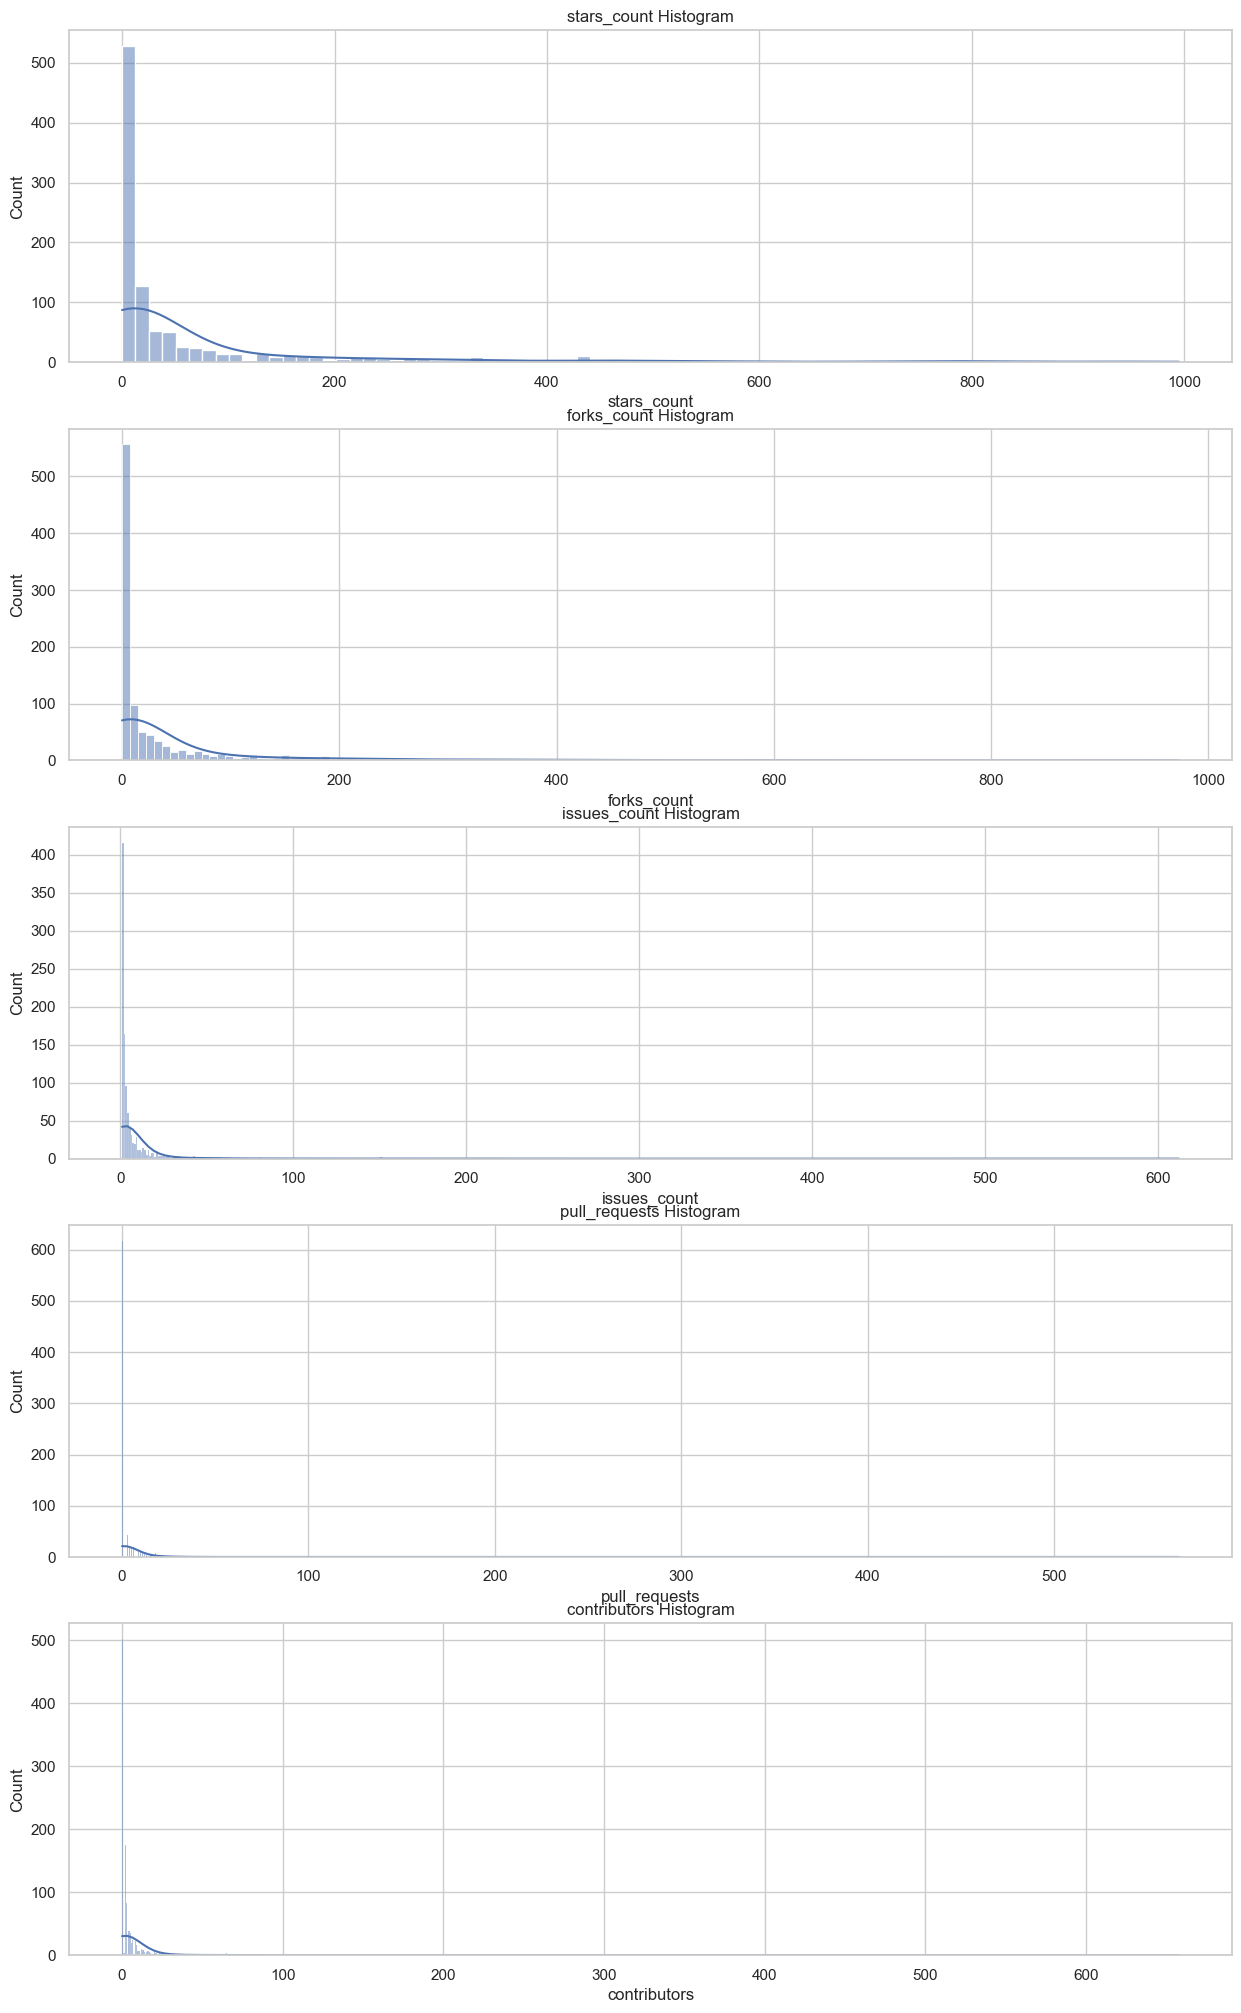

In [6]:
fig, axs = plt.subplots(5, 1, figsize=(15, 25))
# 绘制直方图
for i, column in enumerate(numerical_columns):
    sns.histplot(data=target_data, x=column, kde=True, ax=axs[i])
    axs[i].set_title(f'{column} Histogram')

可以观察到，多数属性呈现右偏分布，  
意味着大多数仓库在星标数、分支数等指标上偏低，但存在少数高值的仓库。

### 2. 使用盒图检查数据离散点

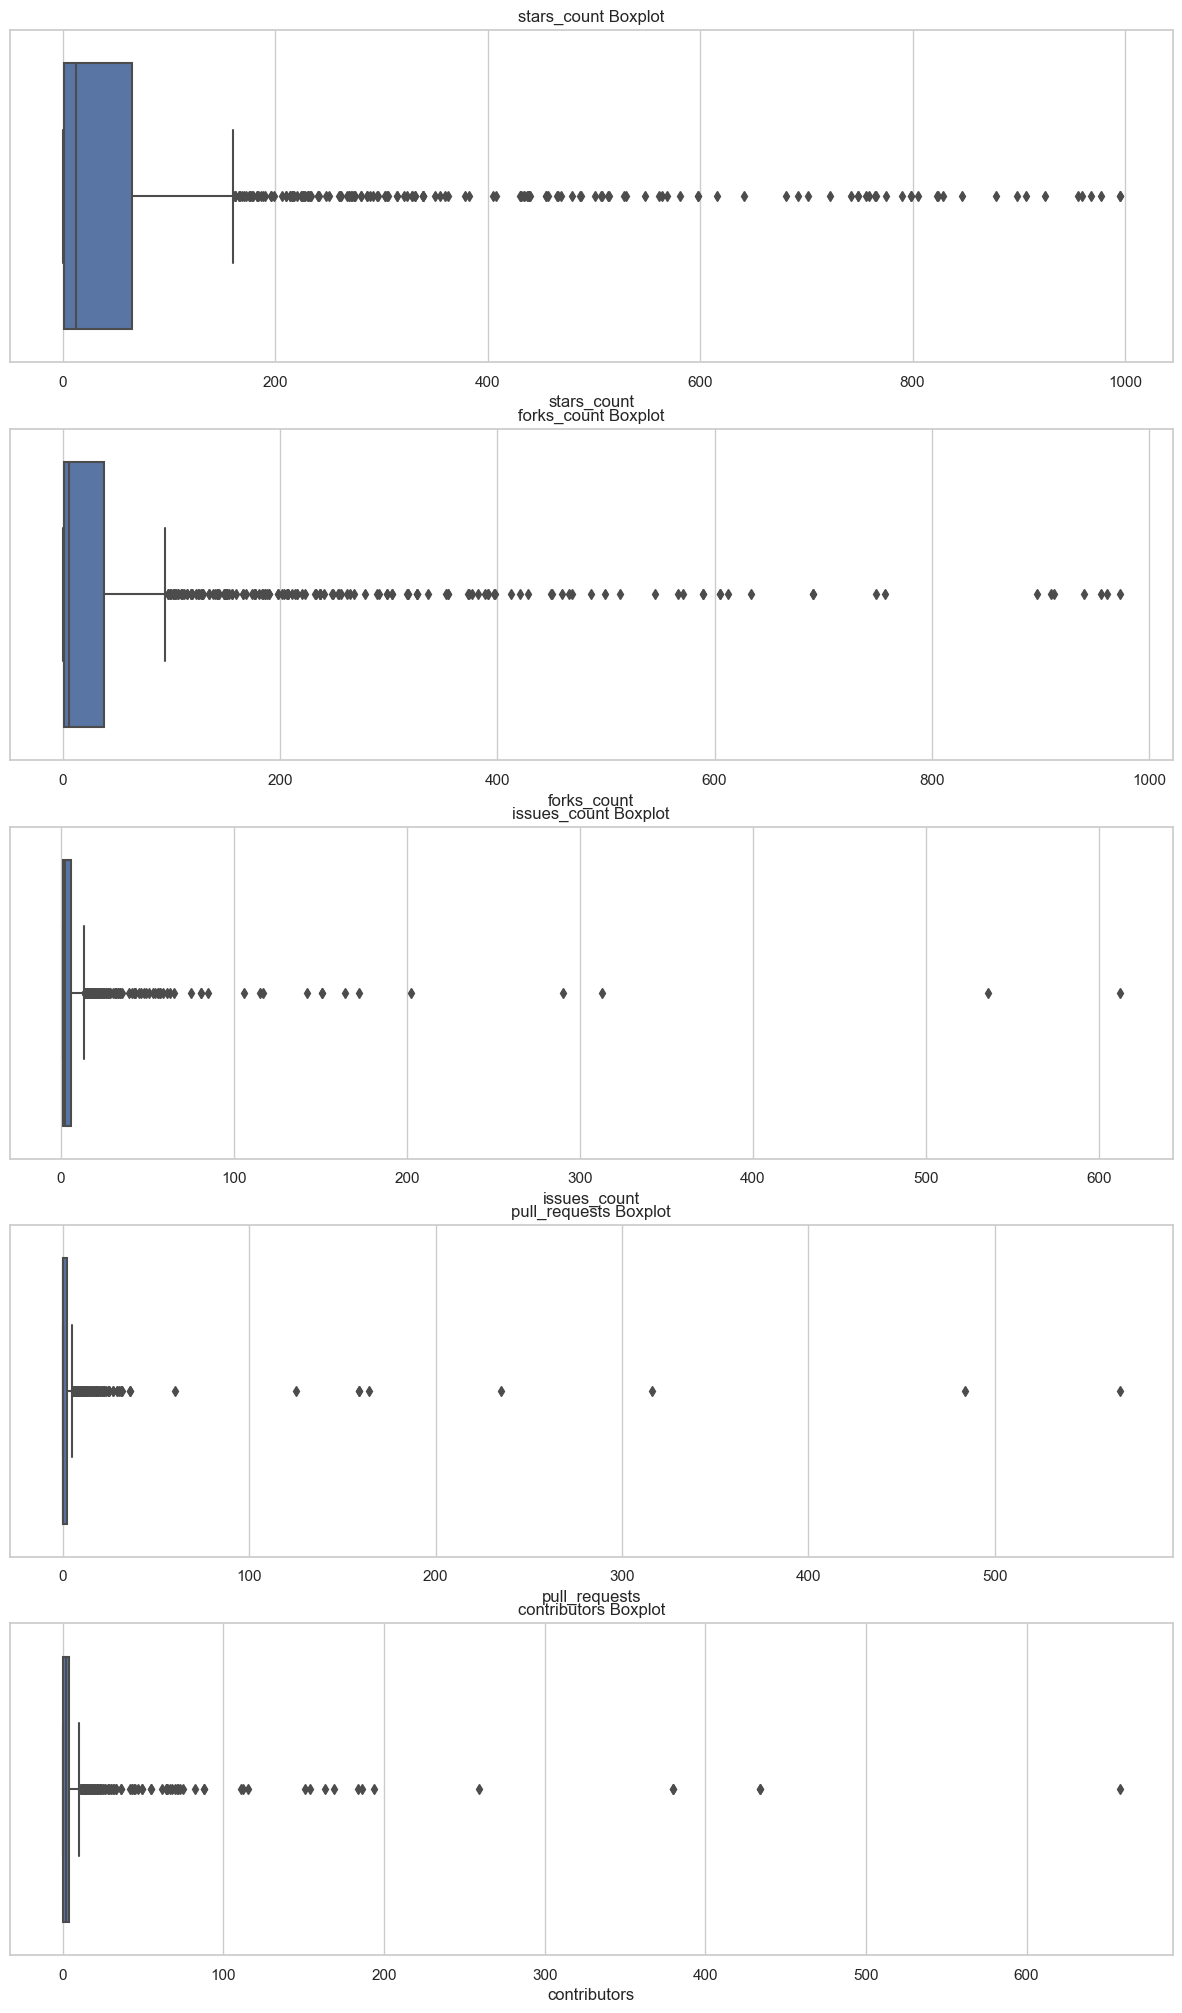

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(15, 25))
# 绘制盒图
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=target_data[column], ax=axs[i])
    axs[i].set_title(f'{column} Boxplot')

可以观察到，几乎所有数值属性中都存在离散点，  
尤其是在stars_count、forks_count和contributors这几个指标上，离散点较为明显，  
这表明有些仓库在这些属性上远高于其他大多数仓库

# 三、缺失数据处理

### 1. 将缺失部分剔除

In [8]:
# 1. 剔除含有缺失值的记录
target_data_dropped = target_data.dropna()
target_data_dropped

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


### 2. 用最高频率值来填补缺失值除

In [9]:
# 2. 使用最高频率值来填补缺失值
mode_language = target_data['language'].mode()[0]  # 获取最高频率的语言
target_data_filled = target_data.fillna({'language': mode_language})

# 显示处理缺失值后的数据集大小变化
original_size = target_data.shape[0]
dropped_size = target_data_dropped.shape[0]
filled_size = target_data_filled.shape[0]
original_size, dropped_size, filled_size, mode_language


(1052, 907, 1052, 'JavaScript')

* 原始数据集大小：1052条记录  
* 剔除含有缺失值的记录后：数据集减少到907条记录  
* 使用最高频率值填补缺失值后：数据集仍然保持1052条记录，但所有缺失的language值都被填补为最高频率的语言'JavaScript'

In [10]:
target_data_filled

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


### 3. 通过属性的相关关系来填补缺失值

In [11]:
target_data_coded = pd.get_dummies(target_data, columns=['language'], dummy_na= True, drop_first= True)
target_data_coded

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language_Assembly,language_AutoHotkey,language_C,language_C#,...,language_Shell,language_Smarty,language_Solidity,language_SourcePawn,language_Svelte,language_Swift,language_TypeScript,language_Vim Script,language_Vue,language_nan
0,octocat/Hello-World,0,0,612,316,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,EddieHubCommunity/support,271,150,536,6,71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ethereum/aleth,0,0,313,27,154,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,localstack/localstack,0,0,290,30,434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,education/classroom,0,589,202,22,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050,gwmccubbin/voting_dapp,11,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation Analysis')

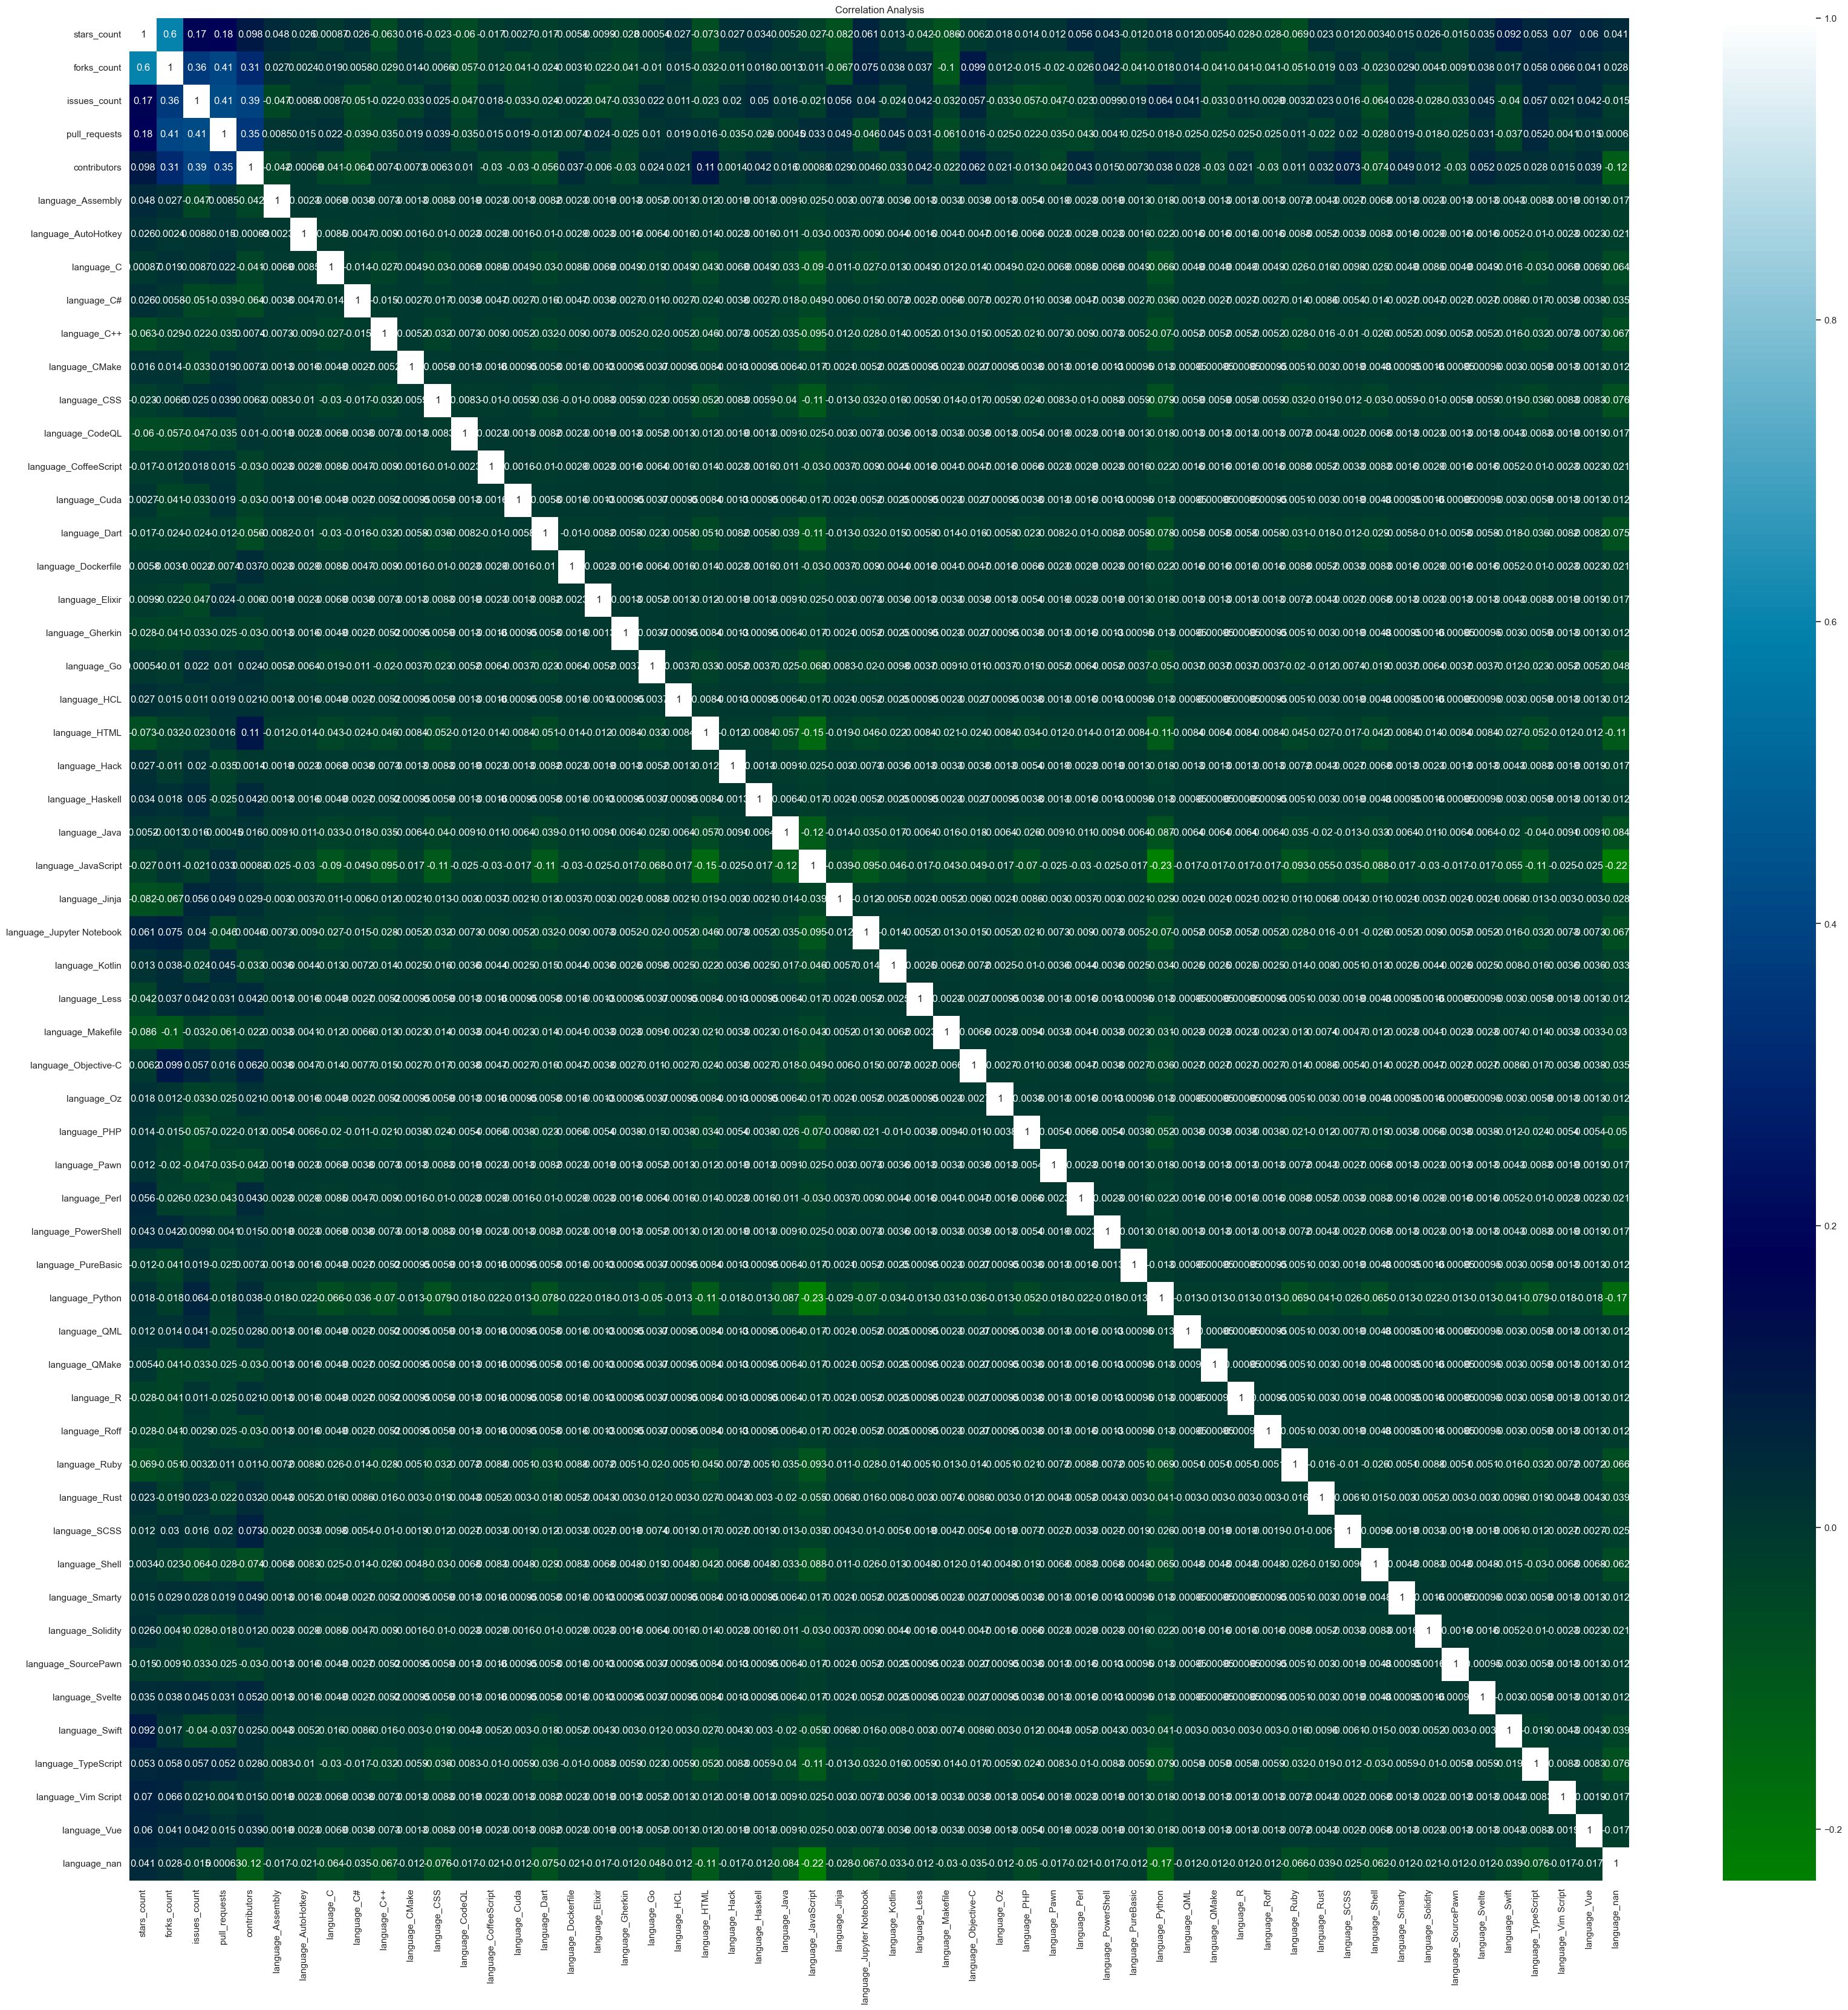

In [12]:
plt.figure(figsize=(40, 40))
sns.heatmap(target_data_coded.corr(method='spearman'), cmap='ocean', annot=True)
plt.title('Correlation Analysis')

In [13]:
#由上面的热力图不难看出language列与stars_count列的相干性最高
#因此下面采用基于stars_count字段的平均值差异方法来填补缺失的language值
github_data_attr_corr = target_data
df1 = github_data_attr_corr.groupby('language').agg(avg = ('stars_count', 'mean'))
df1

,avg
language,
ActionScript,3.000000
Assembly,426.000000
AutoHotkey,118.333333
C,153.076923
C#,43.250000
C++,39.172414
CMake,30.000000
CSS,49.675676
CodeQL,0.000000


In [14]:
from numpy import nan as NA
import warnings
warnings.filterwarnings(action='ignore')
for i in range(len(github_data_attr_corr)):
    if github_data_attr_corr['language'].iloc[i] is NA:
        rate = github_data_attr_corr['stars_count'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_data_attr_corr['language'].iloc[i] = df1.index[idx]
github_data_attr_corr['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

### 4. 通过数据对象之间的相似性来填补缺失值 (拟使用热卡填充法, i.e. Hot Deck Imputation)

In [15]:
#这里采用归一化巨鹿来作为相似性度量
#用这个相似性度量来找到最相似的数据对象

# 选择用于计算相似性的数值属性
attributes = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    for c in attributes:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = (d - MIN) / (MAX - MIN)  # 归一化公式
    return new_df


In [16]:
github_data_sample_corr = target_data
normal_github_data = regularit(github_data_sample_corr)
normal_github_data

,stars_count,forks_count,issues_count,pull_requests,contributors
0,0.000000,0.000000,1.000000,0.557319,0.003040
1,0.272362,0.154162,0.875614,0.010582,0.107903
2,0.000000,0.000000,0.510638,0.047619,0.234043
3,0.000000,0.000000,0.472995,0.052910,0.659574
4,0.000000,0.605344,0.328969,0.038801,0.101824
...,...,...,...,...,...
1047,0.002010,0.001028,0.000000,0.000000,0.000000
1048,0.000000,0.000000,0.000000,0.000000,0.012158
1049,0.000000,0.005139,0.000000,0.001764,0.010638
1050,0.011055,0.005139,0.000000,0.000000,0.000000


In [17]:
normal_language = pd.concat([normal_github_data, github_data_sample_corr['language']], axis=1)
normal_language

,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,0.000000,0.000000,1.000000,0.557319,0.003040,CodeQL
1,0.272362,0.154162,0.875614,0.010582,0.107903,Perl
2,0.000000,0.000000,0.510638,0.047619,0.234043,C++
3,0.000000,0.000000,0.472995,0.052910,0.659574,Python
4,0.000000,0.605344,0.328969,0.038801,0.101824,Ruby
...,...,...,...,...,...,...
1047,0.002010,0.001028,0.000000,0.000000,0.000000,Dart
1048,0.000000,0.000000,0.000000,0.000000,0.012158,HTML
1049,0.000000,0.005139,0.000000,0.001764,0.010638,Python
1050,0.011055,0.005139,0.000000,0.000000,0.000000,JavaScript


In [18]:
infos = []
for i in range(len(normal_language)):
    info = []
    star = normal_language['stars_count'].iloc[i]
    fork = normal_language['forks_count'].iloc[i]
    issue = normal_language['issues_count'].iloc[i]
    pull = normal_language['pull_requests'].iloc[i]
    contributor = normal_language['contributors'].iloc[i]
    info.append(star)
    info.append(fork)
    info.append(issue)
    info.append(pull)
    info.append(contributor)
    infos.append(info)

In [19]:
for i in range(len(normal_language)):
    if normal_language['language'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data_sample_corr['language'].iloc[i] = github_data_sample_corr['language'].iloc[idx]
github_data_sample_corr['language'].value_counts()

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

# 四、预处理前后数据集差异比较分析

### 1. 用最高频率值来填补缺失值除

In [22]:
language_counts_before = target_data['language'].value_counts().sort_index()
language_counts_after = target_data_filled['language'].value_counts().sort_index()

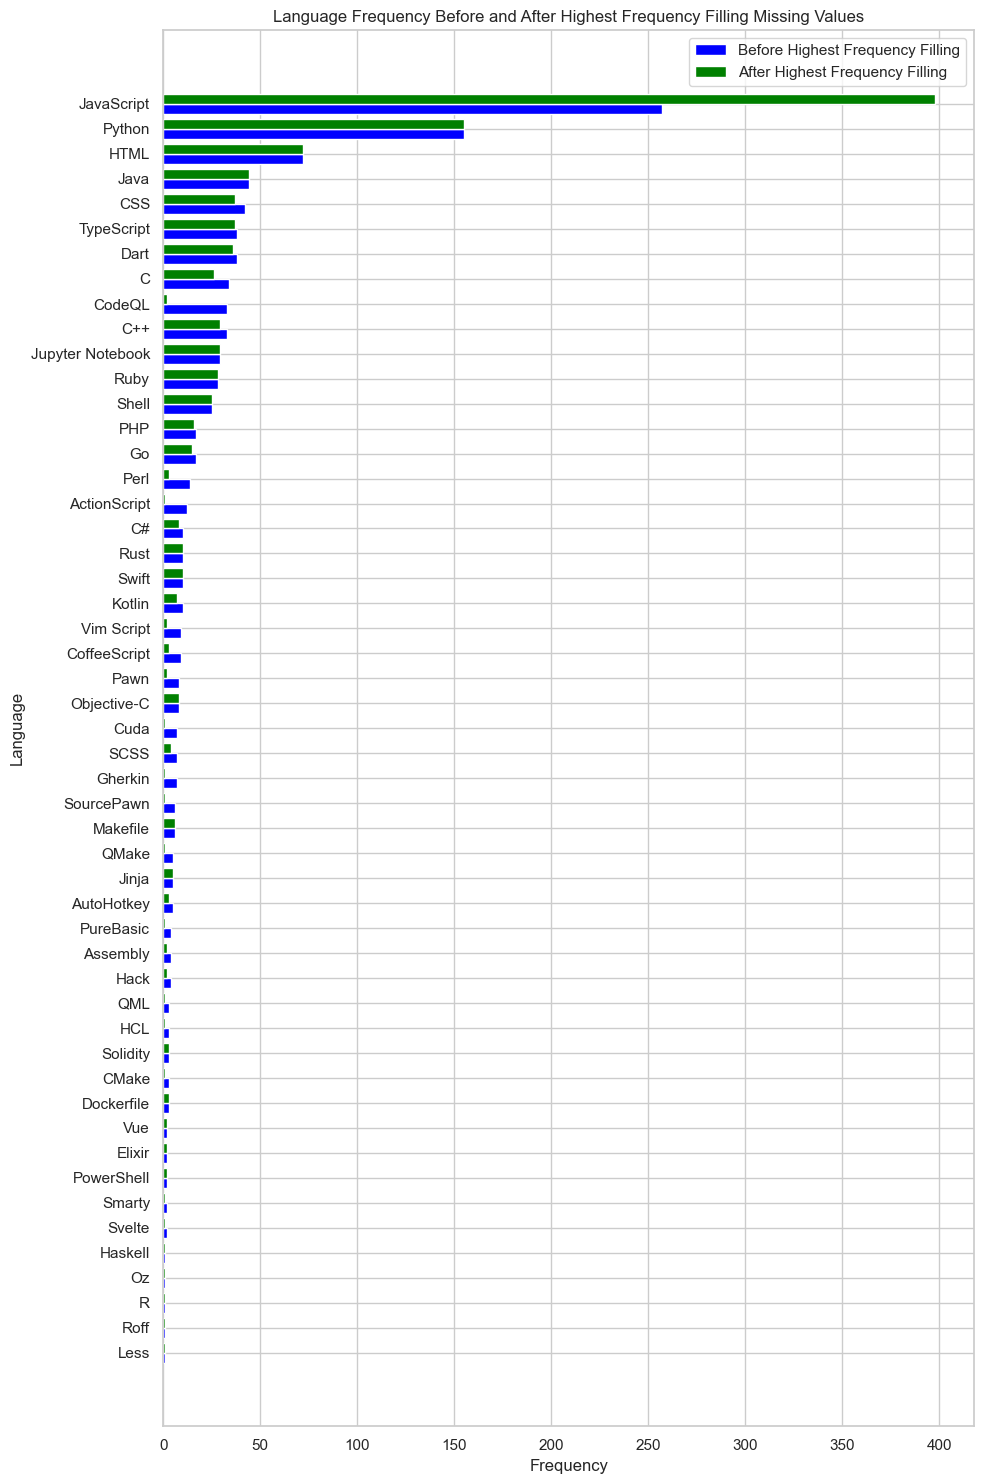

In [23]:

# 合并前后填补数据，准备排序
combined_counts = pd.DataFrame({
    'Before Highest Frequency Filling': language_counts_before,
    'After Highest Frequency Filling': language_counts_after
})

# 按照填补前的频次进行降序排序
combined_counts_sorted = combined_counts.sort_values(by='Before Highest Frequency Filling', ascending=True)

# 绘制横向柱状图
plt.figure(figsize=(10, 15))
y_positions = range(len(combined_counts_sorted))

plt.barh(y_positions, combined_counts_sorted['Before Highest Frequency Filling'], height=0.4, label='Before Highest Frequency Filling', color='blue', align='center')
plt.barh([p + 0.4 for p in y_positions], combined_counts_sorted['After Highest Frequency Filling'], height=0.4, label='After Highest Frequency Filling', color='green', align='center')

plt.yticks([p + 0.2 for p in y_positions], combined_counts_sorted.index)
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.legend()
plt.title('Language Frequency Before and After Highest Frequency Filling Missing Values')
plt.tight_layout()
plt.show()

#可以看出这种简单粗暴的缺失值填补方式，拟合效果并不是很好

### 2. 通过属性的相关关系来填补缺失值

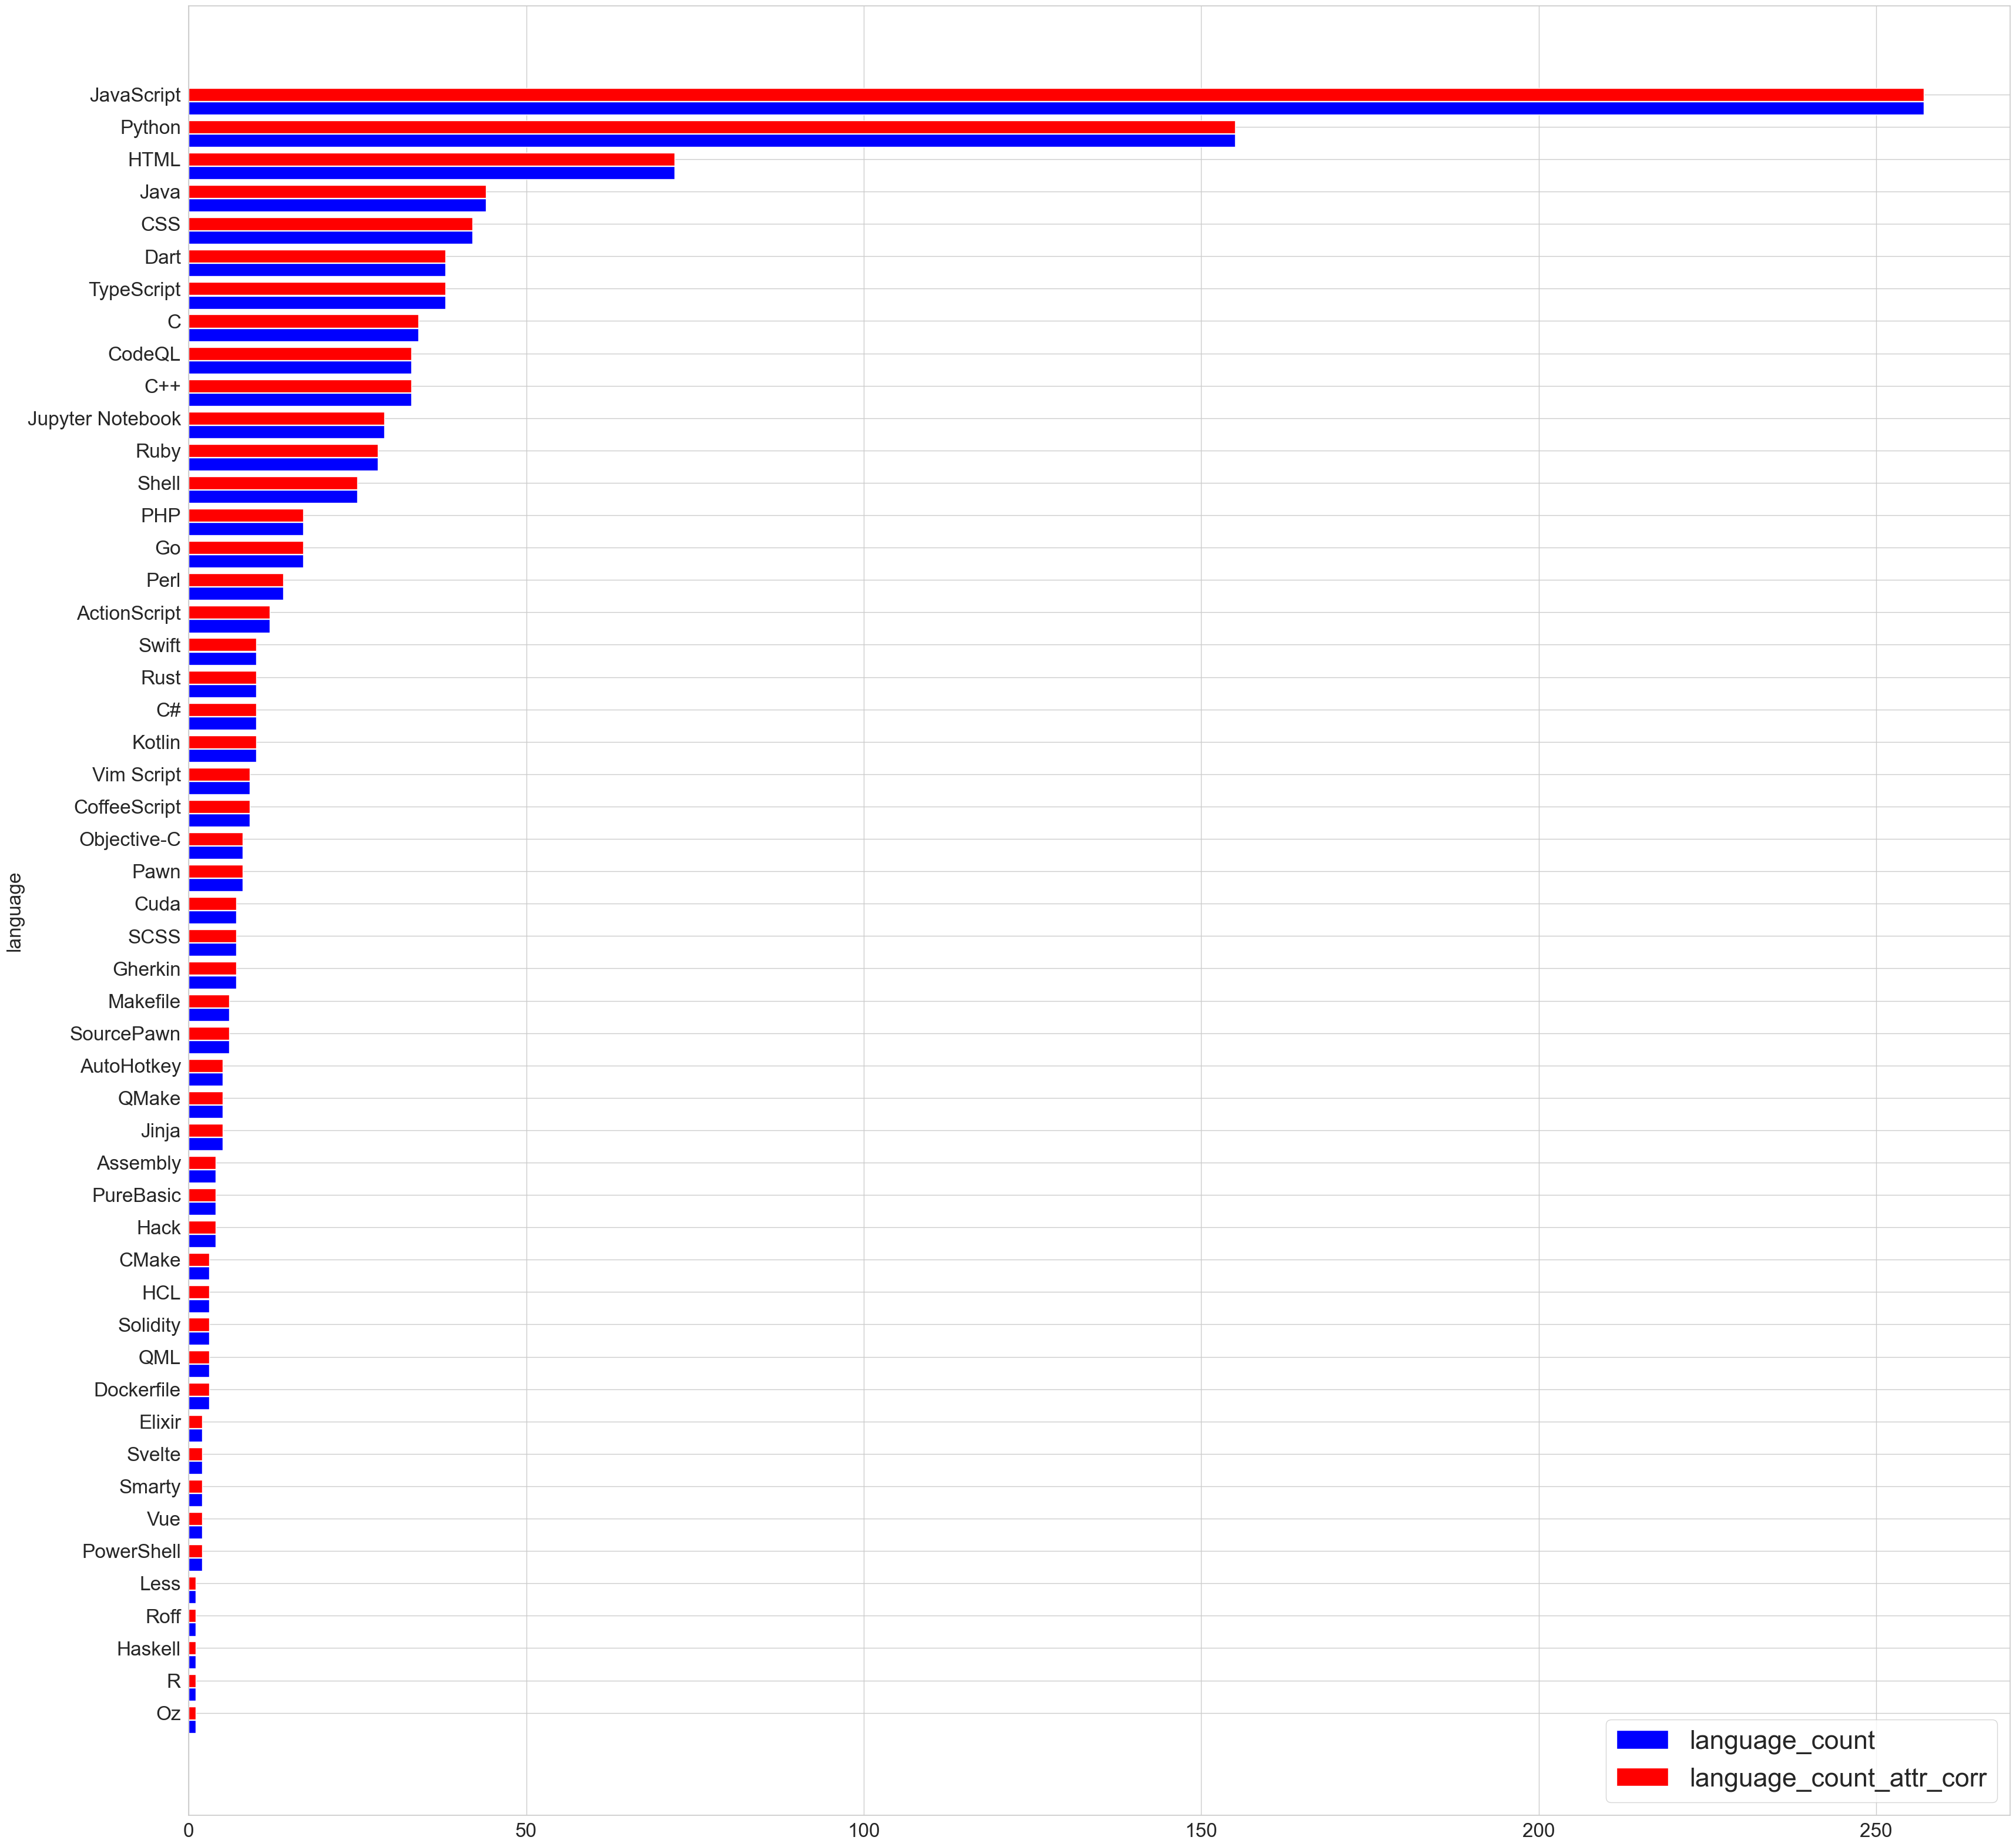

In [24]:
#观察缺失值填补前后，language频次的柱状图，结果表明该方法可以很好的平滑原始分布。
language_counts = pd.DataFrame(target_data['language'].value_counts()).sort_values(by='language', ascending=True).rename(columns={'language': 'language_count'})
language_count_attr_corr = language_counts
language_count_attr_corr['language_count_attr_corr'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_attr_corr['language'].value_counts().index):
        language_count_attr_corr.loc[[level], ['language_count_attr_corr']] = github_data_attr_corr['language'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_attr_corr))), tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count'], label='language_count', height=0.4, color='blue')
plt.barh([d+0.42 for d in list(range(len(language_count_attr_corr)))], tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count_attr_corr'], label='language_count_attr_corr', height=0.4, color='red')
plt.ylabel('language', fontsize=24)
plt.xlabel('', fontsize=24)
# plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

### 3. 通过数据对象之间的相似性来填补缺失值 (拟使用热卡填充法, i.e. Hot Deck Imputation)

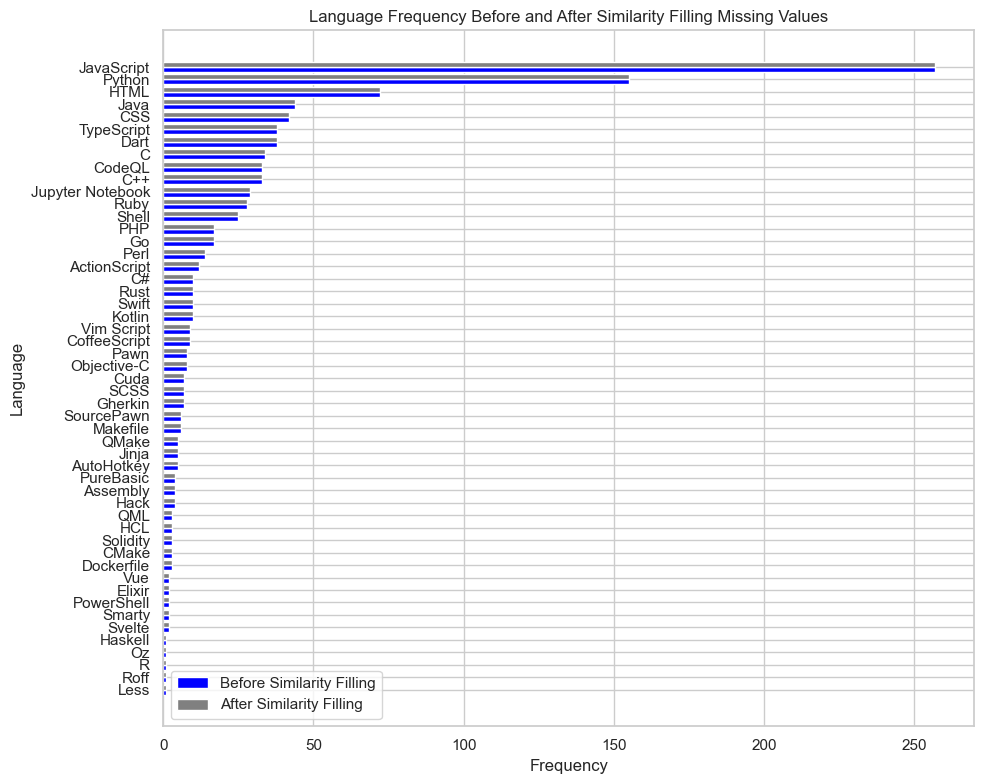

In [25]:

language_counts_before_simulation = language_counts_before
language_counts_after_simulation = github_data_sample_corr['language'].value_counts()
# 将两个Series合并为DataFrame以便于排序和可视化
combined_counts_simulation = pd.DataFrame({
    'Before Similarity Filling': language_counts_before_simulation,
    'After Similarity Filling': language_counts_after_simulation
}).sort_values(by='Before Similarity Filling', ascending=True)

# 绘制横向柱状图
plt.figure(figsize=(10, 8))
y_positions = range(len(combined_counts_simulation))

plt.barh(y_positions, combined_counts_simulation['Before Similarity Filling'], height=0.4, label='Before Similarity Filling', color='blue', align='center')
plt.barh([p + 0.4 for p in y_positions], combined_counts_simulation['After Similarity Filling'], height=0.4, label='After Similarity Filling', color='gray', align='center')

plt.yticks([p + 0.2 for p in y_positions], combined_counts_simulation.index)
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.legend()
plt.title('Language Frequency Before and After Similarity Filling Missing Values')
plt.tight_layout()
plt.show()
#这种去除缺失值的方式也比较平滑可以看出